<p style="text-align: center;font-size:50px;">M. Ammar Siddique <br> BSDSF22M041</p>


<p style="text-align: center;font-size:50px;">Data Mining and Machine Learning </p>


<p style="text-align: center;font-size:50px;">Assignment # 8 </p>

                                                         
<p style="text-align: center;font-size:40px;">Wine Quality data set </p>

## Implementation

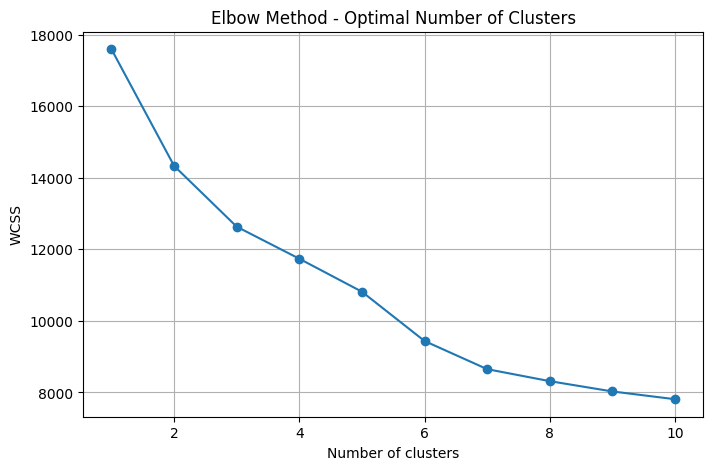


--- Cluster Counts ---
K-Means Cluster Distribution:
KMeans_Cluster
0    722
1    502
2    375
Name: count, dtype: int64

Hierarchical Cluster Distribution:
Hierarchical_Cluster
1    629
2    485
0    485
Name: count, dtype: int64

--- K-Means Cluster Mean Values ---
                fixed acidity  volatile acidity  citric acid  residual sugar  \
KMeans_Cluster                                                                 
0                    7.189889          0.609342     0.123047        2.214058   
1                   10.067131          0.405080     0.469761        2.582570   
2                    8.155467          0.535173     0.289680        3.105467   

                chlorides  free sulfur dioxide  total sulfur dioxide  \
KMeans_Cluster                                                         
0                0.078553            13.507618             34.894737   
1                0.100460            10.888446             30.627490   
2                0.087235            27.10

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

# Step 2: Load Data
df = pd.read_csv("winequality-red.csv")  # Upload this file in Colab or same folder

# Step 3: Preprocess Data
X = df.drop(columns=['quality'])  # Drop target column
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Elbow Method to Find Optimal Clusters (K-Means)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Step 5: Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: Hierarchical Clustering - Dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distances")
plt.show()

# Step 7: Apply Hierarchical Clustering with 3 clusters
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(X_scaled)

# Step 8: PCA for 2D Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Step 9: Visualize Clusters - KMeans
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='Set1')
plt.title("K-Means Clustering (PCA View)")
plt.show()

# Step 10: Visualize Clusters - Hierarchical
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Hierarchical_Cluster', palette='Set2')
plt.title("Hierarchical Clustering (PCA View)")
plt.show()

# Step 11: Summary Output
print("\n--- Cluster Counts ---")
print("K-Means Cluster Distribution:")
print(df['KMeans_Cluster'].value_counts())

print("\nHierarchical Cluster Distribution:")
print(df['Hierarchical_Cluster'].value_counts())

print("\n--- K-Means Cluster Mean Values ---")
print(df.groupby('KMeans_Cluster').mean())

print("\n--- Hierarchical Cluster Mean Values ---")
print(df.groupby('Hierarchical_Cluster').mean())
